In [1]:
# IMporting the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


# Data Collection 

In [2]:
#Read Dataset  
data=pd.read_csv('Train.csv')
print(data.head())

           Tour_ID                   country age_group  \
0  tour_id1hffseyw                     ITALY     45-64   
1  tour_idnacd7zag            UNITED KINGDOM     25-44   
2  tour_id62vz7e71  UNITED STATES OF AMERICA       65+   
3  tour_idrc76tzix                    RWANDA     25-44   
4  tour_idn723m0n9  UNITED STATES OF AMERICA     45-64   

                travel_with  total_female  total_male  \
0             With Children           0.0         2.0   
1               With Spouse           1.0         1.0   
2               With Spouse           1.0         1.0   
3  With Spouse and Children           3.0         1.0   
4                     Alone           0.0         1.0   

                          purpose     main_activity  \
0  Visiting Friends and Relatives     Beach Tourism   
1            Leisure and Holidays  Wildlife Tourism   
2            Leisure and Holidays   Widlife Tourism   
3            Leisure and Holidays     Beach Tourism   
4            Leisure and Holidays

# Exploratory Data Analysis

In [3]:
print(data.shape)

(18506, 21)


In [4]:
print(data.columns)

Index(['Tour_ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'first_trip_tz', 'cost_category'],
      dtype='object')


In [5]:
data.dtypes

Tour_ID                   object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland             int64
night_zanzibar             int64
first_trip_tz             object
cost_category             object
dtype: object

In [6]:
data.describe()

,total_female,total_male,night_mainland,night_zanzibar
count,18504.000000,18500.000000,18506.000000,18506.000000
mean,0.936230,0.998757,9.141576,2.493516
std,1.215582,1.173177,14.127449,5.275156
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.000000,0.000000
50%,1.000000,1.000000,6.000000,0.000000
75%,1.000000,1.000000,11.000000,4.000000
max,49.000000,58.000000,365.000000,240.000000


## 1.Univariate analysis

<AxesSubplot:xlabel='first_trip_tz', ylabel='count'>

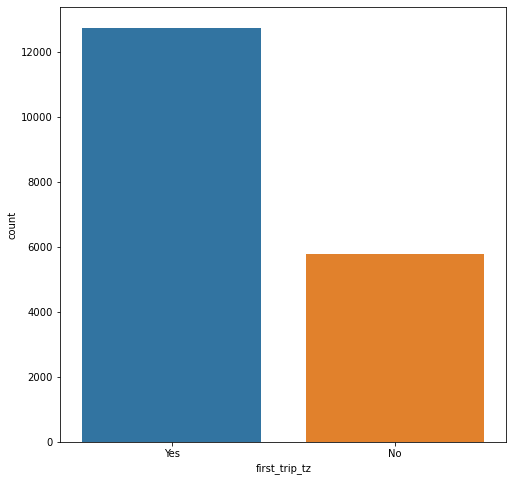

In [7]:
plt.figure(figsize=(8,8))
sns.countplot(x='first_trip_tz',data=data)

<AxesSubplot:xlabel='cost_category', ylabel='count'>

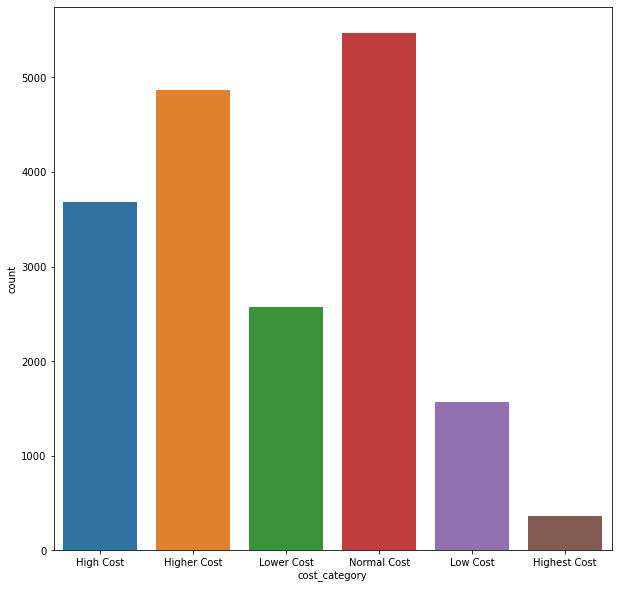

In [8]:
plt.figure(figsize=(10,10))
sns.countplot(x='cost_category',data=data)

<AxesSubplot:xlabel='age_group', ylabel='count'>

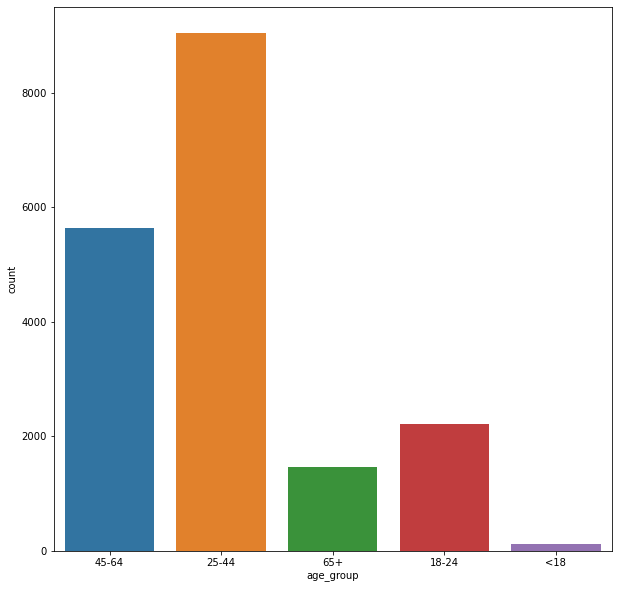

In [9]:
plt.figure(figsize=(10,10))
sns.countplot(x='age_group',data=data)

<AxesSubplot:xlabel='purpose', ylabel='count'>

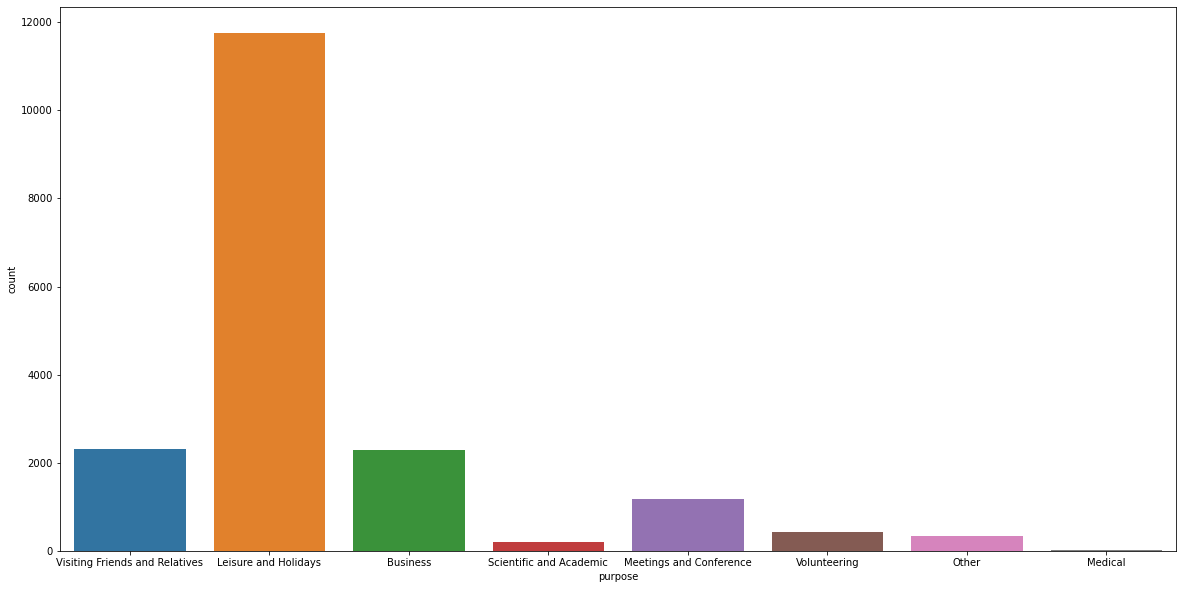

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(x='purpose',data=data)

## 2.Bivariate analysis

<AxesSubplot:>

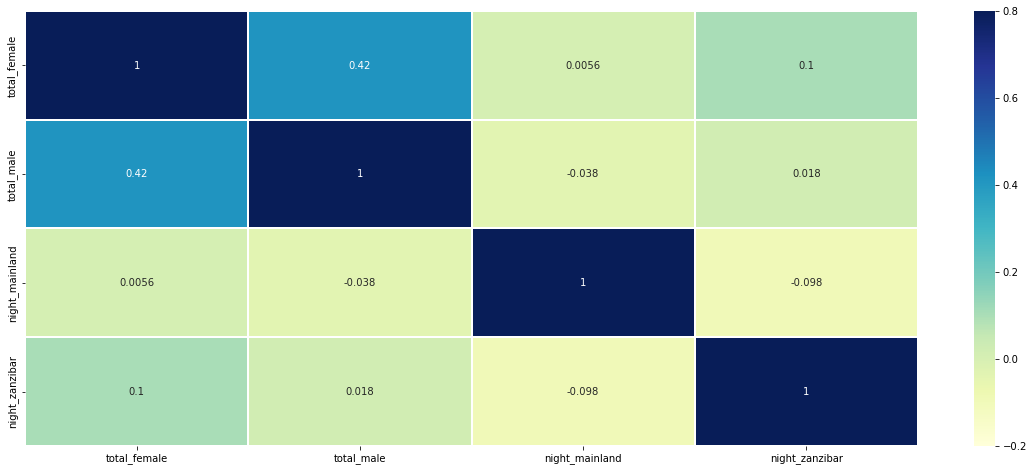

In [11]:
# Correlation Analysis of numerical features
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-.2,vmax=.8,annot=True,linewidth=0.2,cmap='YlGnBu')

<AxesSubplot:xlabel='age_group', ylabel='purpose'>

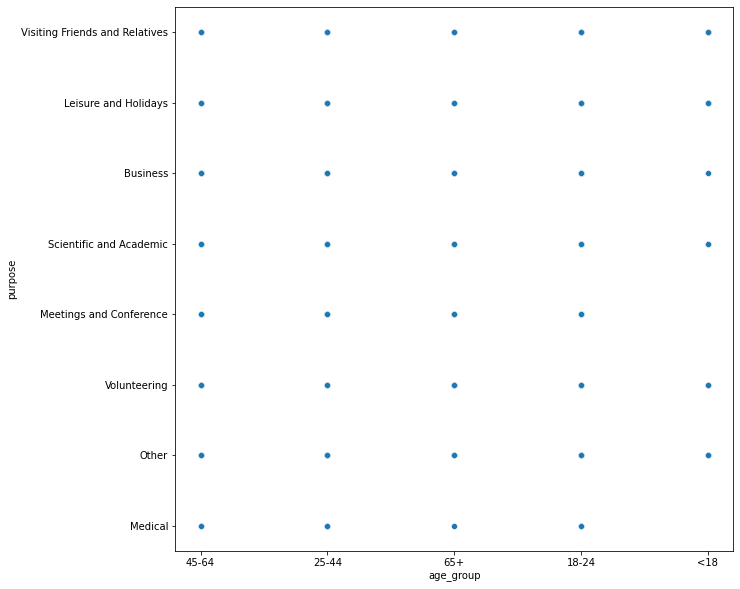

In [24]:
plt.figure(figsize=(10,10))
sns.scatterplot(data['age_group'],data['purpose'])

<AxesSubplot:xlabel='cost_category', ylabel='count'>

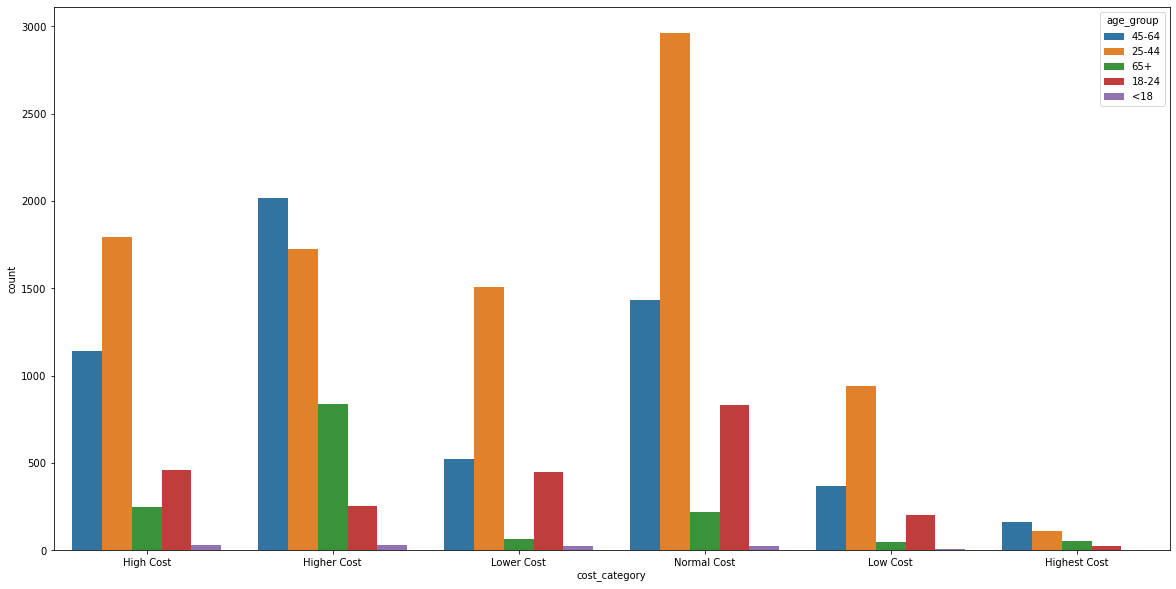

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(x='cost_category',hue='age_group',data=data)

# PreProcessing

##  1.Missing value Handling

In [26]:
data.isna().sum()

Tour_ID                     0
country                     0
age_group                   0
travel_with              1075
total_female                2
total_male                  6
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
first_trip_tz               0
cost_category               0
dtype: int64

There are 1075 missing values in the column travel_with , 2 in the column total_female and 6 in the total_male

In [27]:
data['total_female']=data['total_female'].fillna(data['total_female'].median())

In [28]:
data['total_male']=data['total_male'].fillna(data['total_male'].median())

In [29]:
data.ffill(axis=0,inplace=True)

In [30]:
data.isna().sum()

Tour_ID                  0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
first_trip_tz            0
cost_category            0
dtype: int64

Now all the missing values are replaced

## 2.Outlier detection and handling

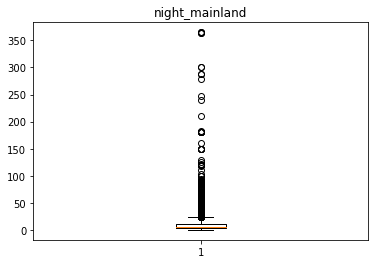

In [31]:
# Checking outliers in the column 'night_mainland'
plt.boxplot(data['night_mainland'])
plt.title("night_mainland")
plt.show()

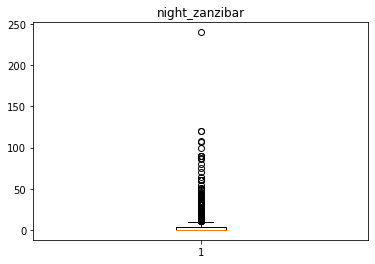

In [32]:
# Checking outliers in the column 'night_zanzibar'
plt.boxplot(data['night_zanzibar'])
plt.title("night_zanzibar")
plt.show()

In [33]:
# Handling outliers in the column 'night_mainland'
Q1=np.percentile(data['night_mainland'],25,interpolation='midpoint')
Q2=np.percentile(data['night_mainland'],50,interpolation='midpoint')
Q3=np.percentile(data['night_mainland'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1-1.5*IQR
uplim=Q3+1.5*IQR
print(lowlim)
print(uplim)
outlier = []
for x in data['night_mainland']:
    if ((x>uplim) or (x,lowlim)):
        outlier.append(x)
ind1=data['night_mainland']>uplim
x=data.loc[ind1].index

data.drop(x,inplace = True)

-9.0
23.0


In [34]:
# Handling outliers in the column 'night_zanzibar'

Q1=np.percentile(data['night_zanzibar'],25,interpolation='midpoint')
Q2=np.percentile(data['night_zanzibar'],50,interpolation='midpoint')
Q3=np.percentile(data['night_zanzibar'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1=1.5*IQR
uplim=Q3+1.5*IQR
print(lowlim)
print(uplim)
outlier = []
for x in data['night_zanzibar']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=data['night_zanzibar']>uplim
y=data.loc[ind1].index

data.drop(y,inplace = True)


6.0
10.0


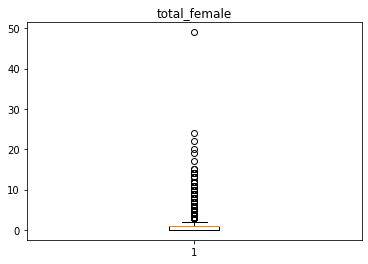

In [35]:
# Checking outliers in the column 'total_female'
plt.boxplot(data['total_female'])
plt.title("total_female")
plt.show()

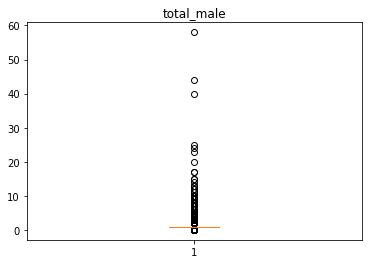

In [36]:
# Checking outliers in the column 'total_male'
plt.boxplot(data['total_male'])
plt.title("total_male")
plt.show()

In [37]:
# Handling outliers in the column 'total_female'
Q1=np.percentile(data['total_female'],25,interpolation='midpoint')
Q2=np.percentile(data['total_female'],50,interpolation='midpoint')
Q3=np.percentile(data['total_female'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1=1.5*IQR
uplim=Q3+1.5*IQR
print(lowlim)
print(uplim)
outlier = []
for x in data['total_female']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=data['total_female']>uplim
y=data.loc[ind1].index

data.drop(y,inplace = True)


1.5
2.5


In [38]:
# Handling outliers in the column 'total_male'
Q1=np.percentile(data['total_male'],25,interpolation='midpoint')
Q2=np.percentile(data['total_male'],50,interpolation='midpoint')
Q3=np.percentile(data['total_male'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1=1.5*IQR
uplim=Q3+1.5*IQR
print(lowlim)
print(uplim)
outlier = []
for x in data['total_male']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=data['total_male']>uplim
y=data.loc[ind1].index

data.drop(y,inplace = True)

0.0
1.0


## 3.Encoding

In [39]:
data['travel_with'].value_counts()

Alone                           7148
With Spouse                     4670
With Other Friends/Relatives    1676
With Children                    323
With Spouse and Children         317
Name: travel_with, dtype: int64

In [40]:
# Label Encoding 'travel_with'
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['travel_with']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])


In [41]:
data['travel_with'].value_counts()

0    7148
3    4670
2    1676
1     323
4     317
Name: travel_with, dtype: int64

In [42]:
data['purpose'].value_counts()

Leisure and Holidays              8905
Business                          1953
Visiting Friends and Relatives    1654
Meetings and Conference           1044
Other                              253
Volunteering                       184
Scientific and Academic            135
Medical                              6
Name: purpose, dtype: int64

In [43]:
# Label Encoding 'purpose'
label_en=LabelEncoder()
a=['purpose']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])

In [44]:
data['purpose'].value_counts()

1    8905
0    1953
6    1654
3    1044
4     253
7     184
5     135
2       6
Name: purpose, dtype: int64

In [45]:
data['main_activity'].value_counts()

Widlife Tourism             4686
Beach Tourism               2971
Wildlife Tourism            1735
Conference Tourism          1561
Hunting Tourism             1337
Cultural Tourism            1062
Mountain Climbing            453
Business                     188
Bird Tourism                 115
Diving and Sport Fishing      26
Name: main_activity, dtype: int64

In [46]:
# Label Encoding 'main_activity'
label_en=LabelEncoder()
a=['main_activity']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])

In [47]:
data['main_activity'].value_counts()

8    4686
0    2971
9    1735
3    1561
6    1337
4    1062
7     453
2     188
1     115
5      26
Name: main_activity, dtype: int64

In [48]:
data['info_source'].value_counts()

Travel agent, tour operator        6237
Friends, relatives                 4539
Others                             1064
Newspaper, magazines, brochures     967
Radio, TV, Web                      916
Trade fair                          187
Tanzania Mission Abroad             145
Inflight magazines                   79
Name: info_source, dtype: int64

In [49]:
# Label Encoding 'info_source'
label_en=LabelEncoder()
a=['info_source']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])

In [50]:
data['info_source'].value_counts()

7    6237
0    4539
3    1064
2     967
4     916
6     187
5     145
1      79
Name: info_source, dtype: int64

In [51]:
data['cost_category'].value_counts()

Normal Cost     4238
Higher Cost     3365
High Cost       2861
Lower Cost      2191
Low Cost        1292
Highest Cost     187
Name: cost_category, dtype: int64

In [52]:
# Label Encoding 'cost_category'
label_en=LabelEncoder()
a=['cost_category']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])


In [53]:
data['cost_category'].value_counts()

5    4238
1    3365
0    2861
4    2191
3    1292
2     187
Name: cost_category, dtype: int64

In [54]:
data['age_group'].value_counts()

25-44    7082
45-64    4239
18-24    1472
65+      1263
<18        78
Name: age_group, dtype: int64

In [55]:
# Label Encoding 'age_group'
label_en=LabelEncoder()
a=['age_group']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])


In [56]:
data['age_group'].value_counts()

1    7082
2    4239
0    1472
3    1263
4      78
Name: age_group, dtype: int64

In [57]:
data['tour_arrangement'].value_counts()

Package Tour    7200
Independent     6934
Name: tour_arrangement, dtype: int64

In [58]:
# Label Encoding 'tour_arrangement'
label_en=LabelEncoder()
a=['tour_arrangement']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])


In [59]:
data['tour_arrangement'].value_counts()

1    7200
0    6934
Name: tour_arrangement, dtype: int64

In [60]:
data['country'].value_counts()

UNITED STATES OF AMERICA    2349
UNITED KINGDOM              1504
ITALY                       1156
KENYA                        687
FRANCE                       666
                            ... 
CYPRUS                         1
ECUADO                         1
LIBERIA                        1
AFGHANISTAN                    1
MONTENEGRO                     1
Name: country, Length: 127, dtype: int64

In [61]:
# Label Encoding 'country'
label_en=LabelEncoder()
a=['country']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])


In [62]:
data['country'].value_counts()

120    2349
119    1504
53     1156
57      687
40      666
       ... 
29        1
35        1
63        1
0         1
74        1
Name: country, Length: 127, dtype: int64

In [63]:
# One hot encoding
data = pd.get_dummies(data, columns = ['package_transport_int','package_accomodation','package_food','package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance','first_trip_tz'],drop_first=True)
data

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,night_zanzibar,cost_category,package_transport_int_Yes,package_accomodation_Yes,package_food_Yes,package_transport_tz_Yes,package_sightseeing_Yes,package_guided_tour_Yes,package_insurance_Yes,first_trip_tz_Yes
1,tour_idnacd7zag,119,1,3,1.0,1.0,1,9,7,1,...,7,0,1,1,1,1,0,0,0,1
2,tour_id62vz7e71,120,3,3,1.0,1.0,1,8,7,1,...,6,1,1,1,1,1,1,1,0,1
4,tour_idn723m0n9,120,2,0,0.0,1.0,1,8,7,1,...,0,1,1,1,1,1,0,1,1,1
5,tour_id8aylf7ba,40,1,3,1.0,1.0,1,8,2,1,...,7,0,1,1,1,0,0,0,0,1
6,tour_idvcadicba,109,1,3,1.0,1.0,1,9,2,0,...,0,5,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,tour_idmp5ciw50,57,2,0,0.0,1.0,4,6,3,0,...,0,4,0,0,0,0,0,0,0,0
18502,tour_ideq0yncfs,57,2,0,1.0,0.0,3,9,3,0,...,0,4,0,0,0,0,0,0,0,0
18503,tour_idv7pz3vs8,120,1,4,2.0,1.0,1,8,7,0,...,0,1,0,0,0,0,0,0,0,1
18504,tour_idy6ydo00w,120,1,3,1.0,1.0,1,3,4,1,...,4,1,1,1,1,1,1,1,0,0


## 4.Feature reduction

In [64]:
# Checking columns
data.columns

Index(['Tour_ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'night_mainland', 'night_zanzibar', 'cost_category',
       'package_transport_int_Yes', 'package_accomodation_Yes',
       'package_food_Yes', 'package_transport_tz_Yes',
       'package_sightseeing_Yes', 'package_guided_tour_Yes',
       'package_insurance_Yes', 'first_trip_tz_Yes'],
      dtype='object')

In [65]:
# Combining 'total_male'  and 'total_female'
data['total_size']=data['total_male']+data['total_female']
data.drop(['total_male'],axis=1,inplace=True)
data.drop(['total_female'],axis=1,inplace=True)

In [66]:
data.drop(['Tour_ID'],axis=1,inplace=True)

In [67]:
data.columns

Index(['country', 'age_group', 'travel_with', 'purpose', 'main_activity',
       'info_source', 'tour_arrangement', 'night_mainland', 'night_zanzibar',
       'cost_category', 'package_transport_int_Yes',
       'package_accomodation_Yes', 'package_food_Yes',
       'package_transport_tz_Yes', 'package_sightseeing_Yes',
       'package_guided_tour_Yes', 'package_insurance_Yes', 'first_trip_tz_Yes',
       'total_size'],
      dtype='object')

In [68]:
data

,country,age_group,travel_with,purpose,main_activity,info_source,tour_arrangement,night_mainland,night_zanzibar,cost_category,package_transport_int_Yes,package_accomodation_Yes,package_food_Yes,package_transport_tz_Yes,package_sightseeing_Yes,package_guided_tour_Yes,package_insurance_Yes,first_trip_tz_Yes,total_size
1,119,1,3,1,9,7,1,0,7,0,1,1,1,1,0,0,0,1,2.0
2,120,3,3,1,8,7,1,6,6,1,1,1,1,1,1,1,0,1,2.0
4,120,2,0,1,8,7,1,7,0,1,1,1,1,1,0,1,1,1,1.0
5,40,1,3,1,8,2,1,14,7,0,1,1,1,0,0,0,0,1,2.0
6,109,1,3,1,9,2,0,7,0,5,0,0,0,0,0,0,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,57,2,0,4,6,3,0,3,0,4,0,0,0,0,0,0,0,0,1.0
18502,57,2,0,3,9,3,0,2,0,4,0,0,0,0,0,0,0,0,1.0
18503,120,1,4,1,8,7,0,9,0,1,0,0,0,0,0,0,0,1,3.0
18504,120,1,3,1,3,4,1,13,4,1,1,1,1,1,1,1,0,0,2.0


In [69]:
data.describe()

,country,age_group,travel_with,purpose,main_activity,info_source,tour_arrangement,night_mainland,night_zanzibar,cost_category,package_transport_int_Yes,package_accomodation_Yes,package_food_Yes,package_transport_tz_Yes,package_sightseeing_Yes,package_guided_tour_Yes,package_insurance_Yes,first_trip_tz_Yes,total_size
count,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000
mean,80.902434,1.391043,1.340951,1.765105,5.224848,3.847106,0.509410,6.691948,1.780388,2.658059,0.334583,0.492359,0.461582,0.424013,0.319230,0.340031,0.147800,0.684520,1.456912
std,40.359802,0.811355,1.425376,1.886021,3.338086,3.090221,0.499929,5.106429,2.798352,2.006259,0.471861,0.499959,0.498540,0.494210,0.466195,0.473736,0.354914,0.464723,0.564352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,103.000000,1.000000,0.000000,1.000000,6.000000,4.000000,1.000000,6.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,119.000000,2.000000,3.000000,1.000000,8.000000,7.000000,1.000000,10.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
max,126.000000,4.000000,4.000000,7.000000,9.000000,7.000000,1.000000,23.000000,10.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [70]:
# Setting x and y parameters
# x denotes feature columns and y denotes target columns
x=data.drop(['cost_category'],axis=1)
y=pd.DataFrame(data['cost_category'])

## 5.Standardization/Normalization

In [71]:
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000,14134.000000
mean,0.642083,0.347761,0.335238,0.252158,0.580539,0.549587,0.509410,0.290954,0.178039,0.334583,0.492359,0.461582,0.424013,0.319230,0.340031,0.147800,0.684520,0.485637
std,0.320316,0.202839,0.356344,0.269432,0.370898,0.441460,0.499929,0.222019,0.279835,0.471861,0.499959,0.498540,0.494210,0.466195,0.473736,0.354914,0.464723,0.188117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.380952,0.250000,0.000000,0.142857,0.333333,0.000000,0.000000,0.130435,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
50%,0.817460,0.250000,0.000000,0.142857,0.666667,0.571429,1.000000,0.260870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.333333
75%,0.944444,0.500000,0.750000,0.142857,0.888889,1.000000,1.000000,0.434783,0.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6.Feature Engineering

In [72]:
# Splitting the data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

# Modelling

In [75]:
# Model 1 : Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [76]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,mean_squared_error
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',f1_score(y_test,y_pred,average='micro'))
print('Accuracy :',accuracy_score(y_test,y_pred)) 
print('MSE :',mean_squared_error(y_test,y_pred))

Confusion matrix : 
 [[393 243   7   8  20 202]
 [166 719  10   2   3  89]
 [  9  38   3   0   0   4]
 [  9  10   0  55 121 178]
 [ 12  19   1  67 363 207]
 [162  88   3  80 121 829]]
F1_score : 0.5569441169535487
Accuracy : 0.5569441169535487
MSE : 3.531950011789672


In [77]:
# Model 2 : Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [78]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',f1_score(y_pred, y_test,average='micro'))
print('Accuracy :',accuracy_score(y_test,y_pred))

Confusion matrix : 
 [[367 223  19  19  38 207]
 [214 567  31  14  19 144]
 [ 12  33   3   1   0   5]
 [ 14  16   0 103 117 123]
 [ 30  26   0 149 311 153]
 [229 107   3 175 177 592]]
F1_score : 0.45814666352275407
Accuracy : 0.45814666352275407


In [79]:
# Model 3 : Logistic Regression
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [80]:
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',f1_score(y_pred, y_test,average='micro'))
print('Accuracy :',accuracy_score(y_test,y_pred))

Confusion matrix : 
 [[324 309   0   0  17 223]
 [150 742   0   0   2  95]
 [ 15  38   0   0   0   1]
 [ 11   9   0   0 175 178]
 [  9  23   0   0 405 232]
 [138  88   0   0 207 850]]
F1_score : 0.5472765857109172
Accuracy : 0.5472765857109172


Of these three models, Random Forest Model has better accuracy of about 0.549 than the logistic regression model and the 
decision tree model.Hence we can predict the outcome using the Random Forest Model

# Model Fine Tuning

In [81]:
rf.fit(x_train,y_train)
rft=RandomForestClassifier(n_estimators=150,max_depth=10,random_state=42,criterion='entropy')
rft.fit(x_train,y_train)
y_pred=rft.predict(x_test)
print('F1 score : ',f1_score(y_test,y_pred,average='micro'))
print('Accuracy : ', accuracy_score(y_test,y_pred))


F1 score :  0.5805234614477718
Accuracy :  0.5805234614477718


After fine tuning of the Random forest model, the accuracy is improved to 0.58